Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [3]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.

    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.

    Returns:
        (tuple): tuple of two point of line.
    '''

    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [4]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    # Convert image to gray scale as cv2.HoughCircles only work with grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Hough Circles to detect circles in the gray image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=100)

    # If circles are detected, remove them from the original image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(out_img, (x, y), r+2, (0, 0, 0), -1)

    return out_img

Test your implementation (dont change this cell)

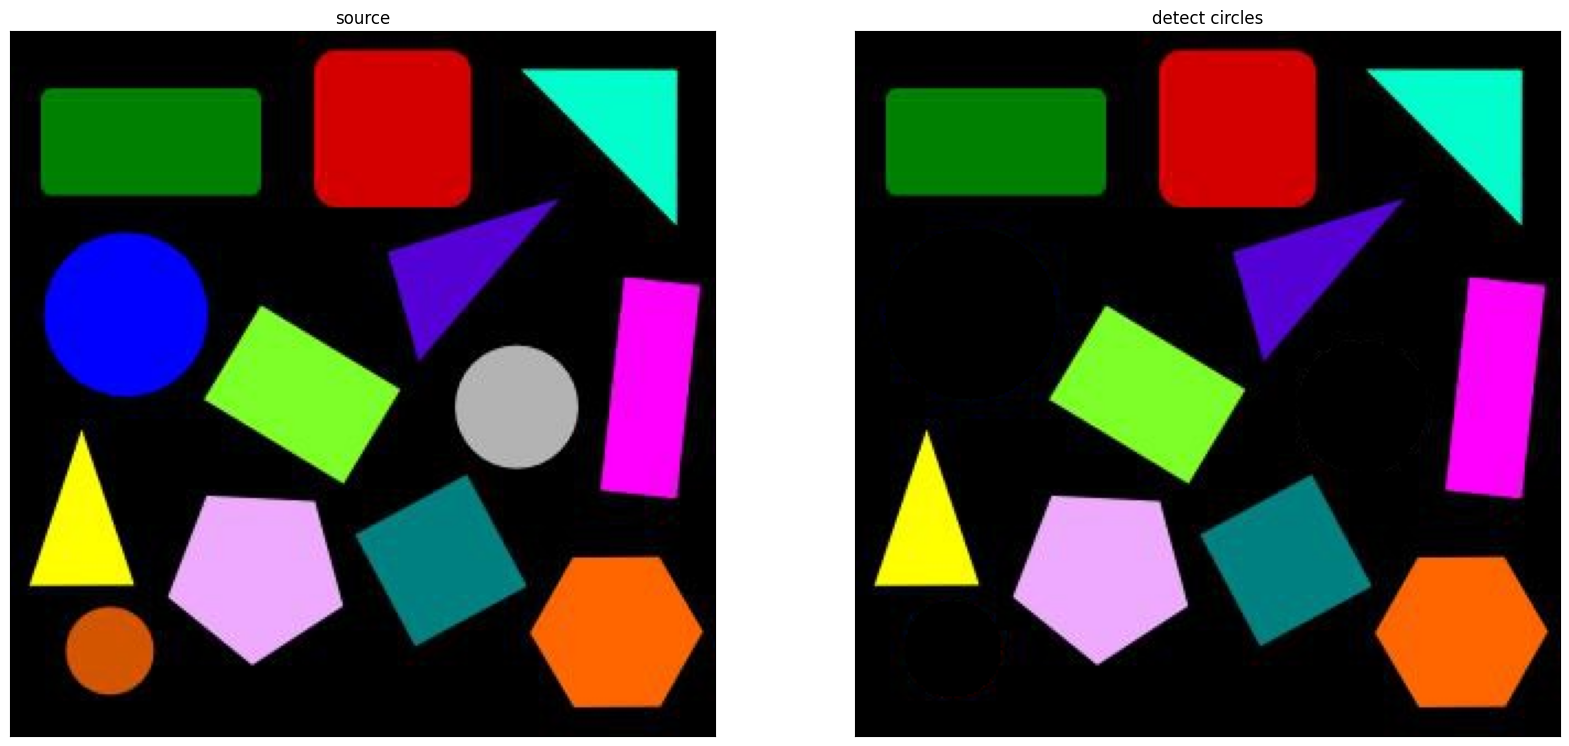

In [6]:
image_list = []

image = cv2.imread(os.path.join('images', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img_a = remove_circles(image)

image_list.append([cv2.cvtColor(out_img_a, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [7]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection to the grayscale image
    edges = cv2.Canny(gray, 40, 90, apertureSize=3)

    # Apply Probabilistic Hough Line Transform to the edge detected image
    # Using cv2.HoughLinesP
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=0)

    # Draw the lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return out_img

In [8]:
# Using cv2.HoughLines

def detect_lines_hough_extra(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection to the grayscale image
    edges = cv2.Canny(gray, 40, 90, apertureSize=3)

    # Apply Hough Line Transform to the edge detected image
    lines = cv2.HoughLines(edges, 1, np.pi / 90, 50)

    # Draw the lines on the original image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            x1, y1, x2, y2 = pol_to_car(rho, theta)
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return out_img

Test your implementation (dont change this cell)

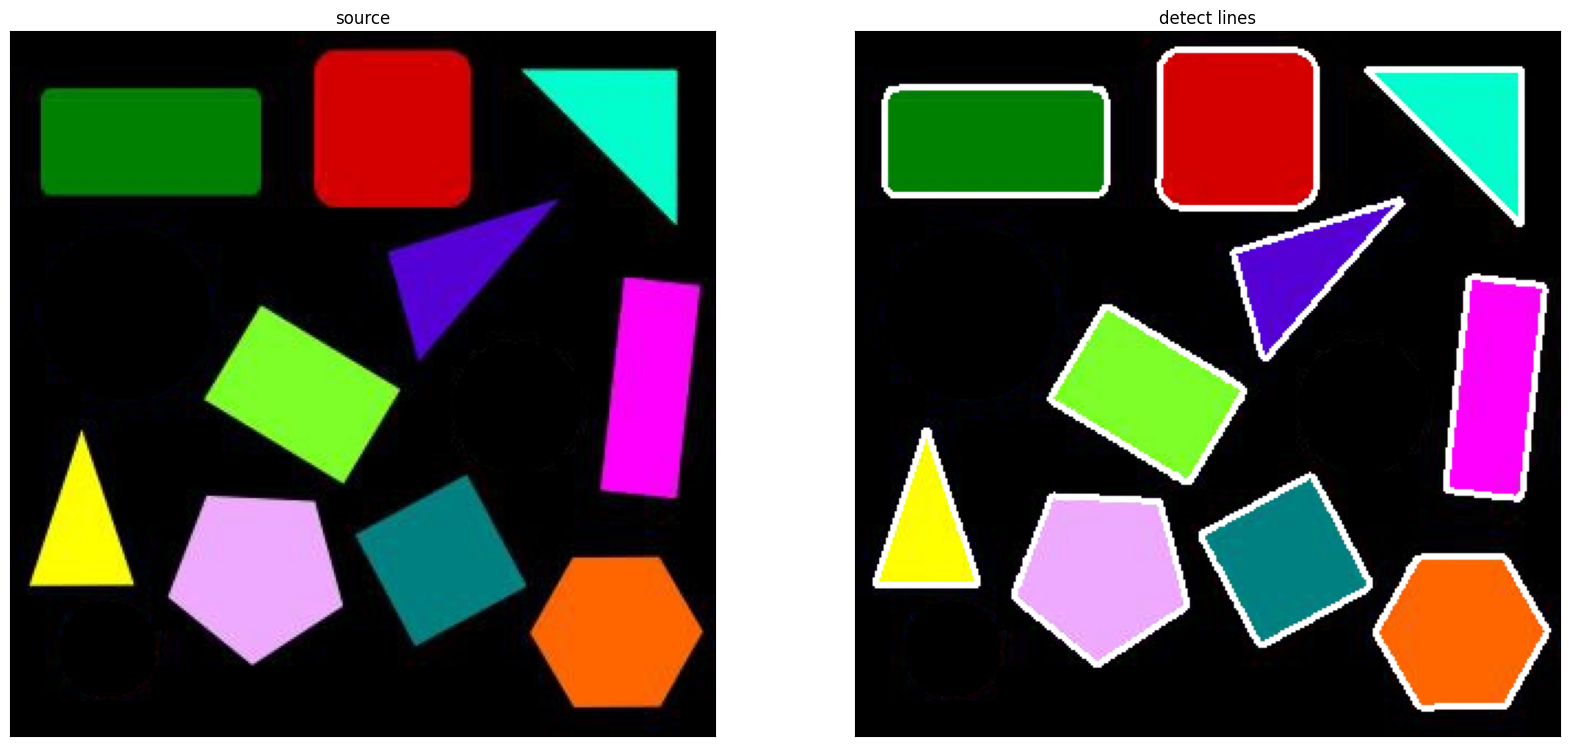

In [9]:
image_list = []

# image = cv2.imread(os.path.join('images', 'q4a.png'))
image_list.append([cv2.cvtColor(out_img_a, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img_b = detect_lines_hough(out_img_a)

image_list.append([cv2.cvtColor(out_img_b, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

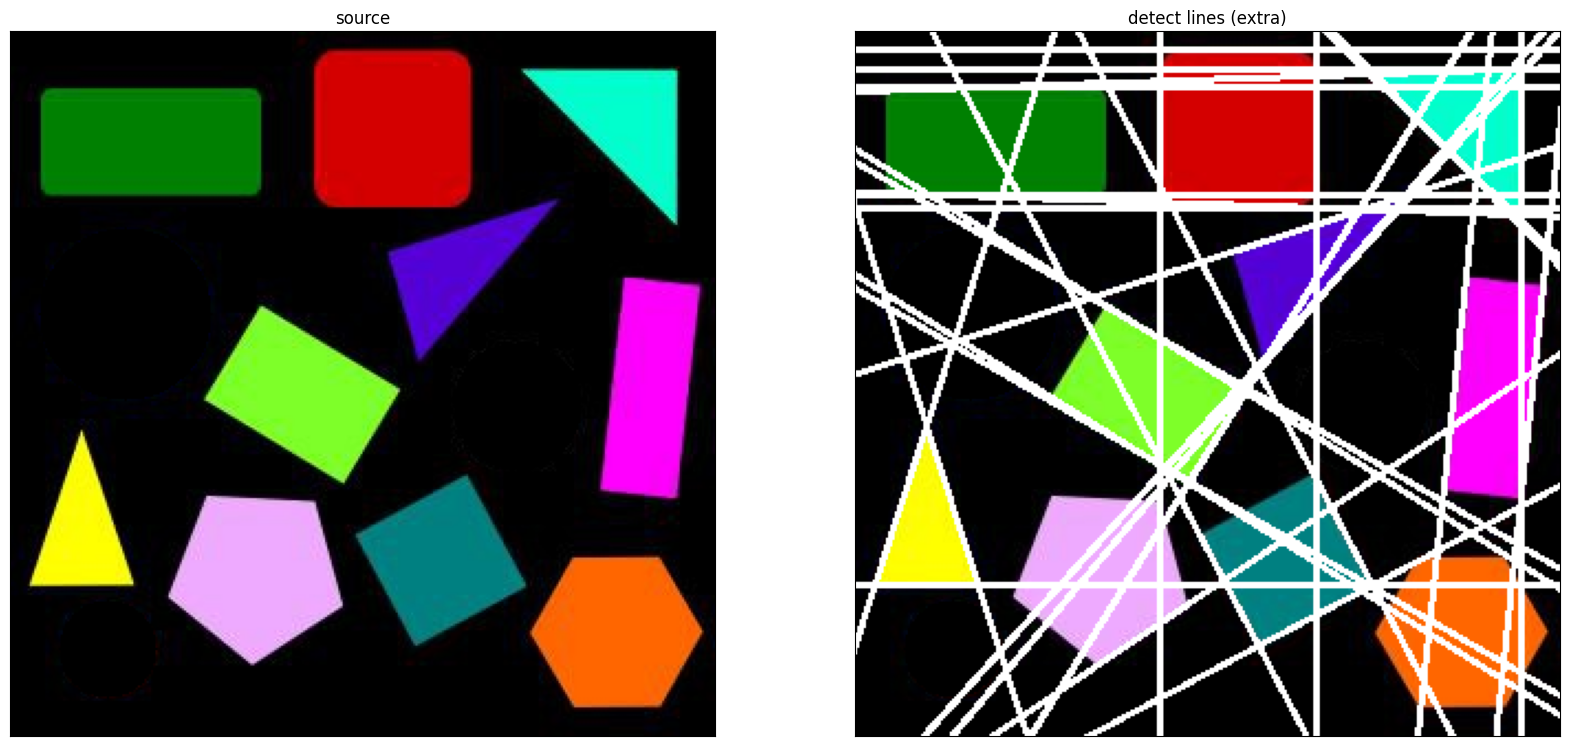

In [10]:
image_list = []

image_list.append([cv2.cvtColor(out_img_a, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img_b = detect_lines_hough_extra(out_img_a)

image_list.append([cv2.cvtColor(out_img_b, cv2.COLOR_BGR2RGB), 'detect lines (extra)', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b_extra')

# part d

In [102]:
from operator import itemgetter

def find_shapes(iamge):
    out_img = image.copy()

    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    detected_shapes = set()

    for contour in contours:
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        shape_tuple = (approx, cv2.boundingRect(approx))

        vertices = len(shape_tuple[0])

        shape_class = 'Unknown'

        x, y, w, h = shape_tuple[1]
        aspect_ratio = w / float(h)

        if vertices == 3:
            shape_class = "Triangle"
        elif vertices == 4:
            if aspect_ratio > 0.9 and aspect_ratio < 1.1:
                shape_class = "Square"
            else:
                shape_class = "Rectangle"
        elif vertices == 5:
            shape_class = "Pentagon"
        elif vertices < 8 and vertices >= 5:
            shape_class = "Polygon"
        elif vertices >= 8:
            shape_class = "Circle"
        if shape_class in detected_shapes:
            continue

        detected_shapes.add(shape_class)

        loc = (x, y - 7)

        out_img = cv2.drawContours(out_img, [shape_tuple[0]], 0, (0, 0, 255), 2)
        for point in shape_tuple[0]:
            cv2.circle(out_img, tuple(point[0]), 3, (0,255,0), -1)
        cv2.putText(out_img, shape_class, loc, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    return out_img

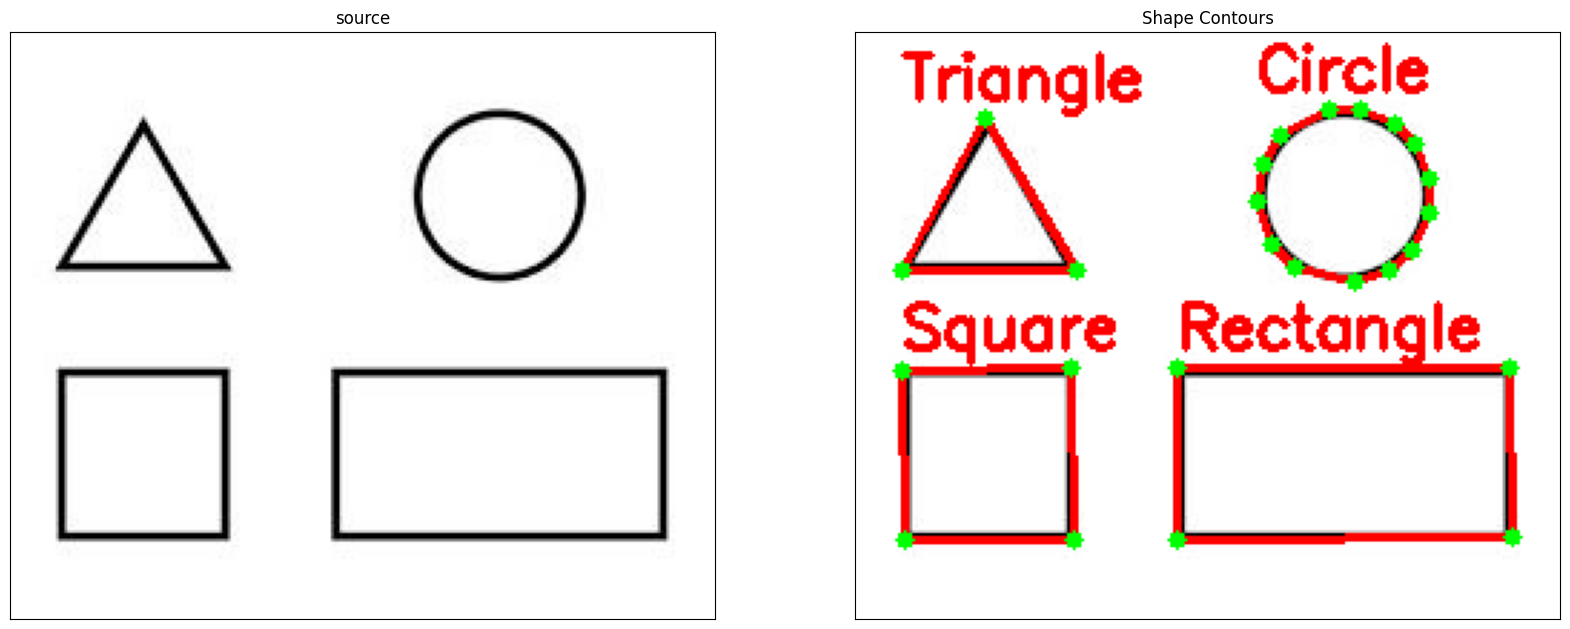

In [103]:
image_list = []

image = cv2.imread(os.path.join('images', '7.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img_a = find_shapes(image)

image_list.append([cv2.cvtColor(out_img_a, cv2.COLOR_BGR2RGB), 'Shape Contours', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4c')